<h2 align='center'>IPL MATCH WIN PREDICTOR</h2>

In [55]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [56]:
matches = pd.read_csv('match_info_data.csv')
deliveries = pd.read_csv('match_data.csv')
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1370353,2023,Ahmedabad,5/29/2023,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan
1,1370352,2023,Ahmedabad,5/26/2023,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,Gujarat Titans,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,J Madanagopal


In [57]:
deliveries.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1370353,2023,5/29/2023,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
1,1370353,2023,5/29/2023,"Narendra Modi Stadium, Ahmedabad",1,0.2,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353


In [58]:
matches.shape, deliveries.shape

((1024, 18), (243817, 23))

In [59]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [60]:
matches['season'].value_counts()

season
2013       76
2023       74
2022       74
2012       74
2011       73
2021       60
2020/21    60
2019       60
2018       60
2016       60
2014       60
2009/10    60
2017       59
2015       59
2007/08    58
2009       57
Name: count, dtype: int64

In [61]:
matches['city'].nunique()

35

In [62]:
deliveries.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'cricsheet_id'],
      dtype='object')

In [63]:
deliveries['match_id'].nunique()

1024

In [64]:
totalrun_df = deliveries.groupby(['match_id', 'innings'])['runs_off_bat'].sum().reset_index()
totalrun_df

,match_id,innings,runs_off_bat
0,335982,1,205
1,335982,2,63
2,335983,1,234
3,335983,2,196
4,335984,1,122
...,...,...,...
2070,1370351,2,91
2071,1370352,1,223
2072,1370352,2,164
2073,1370353,1,210


In [65]:
totalrun_df['innings'].nunique()

6

In [66]:
totalrun_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   match_id      2075 non-null   int64
 1   innings       2075 non-null   int64
 2   runs_off_bat  2075 non-null   int64
dtypes: int64(3)
memory usage: 48.8 KB


In [67]:
# capturing only the first innings, as we well be  predicting for the second innings

# Filtering rows where inning equals 1
totalrun_df = totalrun_df[totalrun_df['innings'] == 1]

# Incrementing the values in the total_runs column by 1
totalrun_df['runs_off_bat'] = totalrun_df['runs_off_bat'].apply(lambda x: x + 1)
totalrun_df

,match_id,innings,runs_off_bat
0,335982,1,206
2,335983,1,235
4,335984,1,123
6,335985,1,155
8,335986,1,101
...,...,...,...
2065,1359544,1,191
2067,1370350,1,168
2069,1370351,1,167
2071,1370352,1,224


In [68]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [69]:
'''
mergin the total first innings score df with the matches df,
where left side merging is done on 'id columns for the matches and
righe side merging is done on 'match_id' column of the totalrun_df 
'''

match_df = matches.merge(totalrun_df[['match_id', 'runs_off_bat']], left_on='id', right_on='match_id')
match_df.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,runs_off_bat
0,1370353,2023,Ahmedabad,5/29/2023,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan,1370353,211
1,1370352,2023,Ahmedabad,5/26/2023,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,Gujarat Titans,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,J Madanagopal,1370352,224


In [70]:
match_df['team1'].unique()

array(['Gujarat Titans', 'Mumbai Indians', 'Chennai Super Kings',
       'Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Lucknow Super Giants', 'Punjab Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [71]:
match_df['team2'].unique()

array(['Chennai Super Kings', 'Mumbai Indians', 'Lucknow Super Giants',
       'Gujarat Titans', 'Kolkata Knight Riders', 'Delhi Capitals',
       'Rajasthan Royals', 'Royal Challengers Bangalore', 'Punjab Kings',
       'Sunrisers Hyderabad', 'Kings XI Punjab', 'Delhi Daredevils',
       'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [72]:
teams = ['Chennai Super Kings', 'Mumbai Indians', 'Lucknow Super Giants',
       'Gujarat Titans', 'Kolkata Knight Riders', 'Delhi Capitals',
       'Rajasthan Royals', 'Royal Challengers Bangalore', 'Punjab Kings',
       'Sunrisers Hyderabad'
       ]

In [73]:
# replacing the 'Delhi Daredevils' with 'Delhi Capitals'
match_df['team1']= match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']= match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

#replacing the Kings XI Punjab' with 'Punjab Kings'
match_df['team1']= match_df['team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['team2']= match_df['team2'].str.replace('Kings XI Punjab','Punjab Kings')

#replacing the 'Deccan Chargers' with 'Sunrisers Hyderabad'
match_df['team1']= match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']= match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [74]:
match_df['team1'].unique()

array(['Gujarat Titans', 'Mumbai Indians', 'Chennai Super Kings',
       'Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Lucknow Super Giants', 'Punjab Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Rajasthan Royals',
       'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Kochi Tuskers Kerala'],
      dtype=object)

In [75]:
match_df['team2'].unique()

array(['Chennai Super Kings', 'Mumbai Indians', 'Lucknow Super Giants',
       'Gujarat Titans', 'Kolkata Knight Riders', 'Delhi Capitals',
       'Rajasthan Royals', 'Royal Challengers Bangalore', 'Punjab Kings',
       'Sunrisers Hyderabad', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Kochi Tuskers Kerala'],
      dtype=object)

In [76]:
match_df.shape

(1024, 20)

In [77]:
teams

['Chennai Super Kings',
 'Mumbai Indians',
 'Lucknow Super Giants',
 'Gujarat Titans',
 'Kolkata Knight Riders',
 'Delhi Capitals',
 'Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Punjab Kings',
 'Sunrisers Hyderabad']

In [78]:
# will consider only frequently occuring teams, which are mentioned in the team list

match_df = match_df[match_df['team1'].isin(teams)]
match_df =match_df[match_df['team2'].isin(teams)]

In [79]:
match_df.shape

(909, 20)

In [80]:
match_df['team1'].value_counts()

team1
Royal Challengers Bangalore    127
Chennai Super Kings            116
Punjab Kings                   112
Delhi Capitals                 111
Mumbai Indians                 108
Sunrisers Hyderabad            108
Kolkata Knight Riders          105
Rajasthan Royals                92
Gujarat Titans                  15
Lucknow Super Giants            15
Name: count, dtype: int64

In [81]:
match_df['team2'].value_counts()

team2
Mumbai Indians                 122
Kolkata Knight Riders          117
Sunrisers Hyderabad            117
Delhi Capitals                 111
Rajasthan Royals               107
Punjab Kings                   105
Chennai Super Kings            100
Royal Challengers Bangalore     97
Gujarat Titans                  18
Lucknow Super Giants            15
Name: count, dtype: int64

In [82]:
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,runs_off_bat
0,1370353,2023,Ahmedabad,5/29/2023,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan,1370353,211
1,1370352,2023,Ahmedabad,5/26/2023,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,Gujarat Titans,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,J Madanagopal,1370352,224
2,1370351,2023,Chennai,5/24/2023,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,normal,0,Mumbai Indians,81,0,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",BNJ Oxenford,VK Sharma,CB Gaffaney,1370351,167
3,1370350,2023,Chennai,5/23/2023,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,normal,0,Chennai Super Kings,15,0,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",AK Chaudhary,CB Gaffaney,BNJ Oxenford,1370350,168
4,1359543,2023,Mumbai,5/21/2023,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,C Green,"Wankhede Stadium, Mumbai",KN Ananthapadmanabhan,RJ Tucker,R Pandit,1359543,189


In [83]:
match_df['dl_applied'].value_counts()

dl_applied
0    892
1     17
Name: count, dtype: int64

In [84]:
match_df[match_df['dl_applied']==1].style.background_gradient(cmap='plasma')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,runs_off_bat
0,1370353,2023,Ahmedabad,5/29/2023,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan,1370353,211
72,1359476,2023,Chandigarh,4/1/2023,Punjab Kings,Kolkata Knight Riders,Kolkata Knight Riders,field,D/L,1,Punjab Kings,7,0,Arshdeep Singh,"Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh",BNJ Oxenford,YC Barde,J Madanagopal,1359476,188
356,1136592,2018,Delhi,5/2/2018,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,field,D/L,1,Delhi Daredevils,4,0,RR Pant,Arun Jaitley Stadium,CK Nandan,VK Sharma,BNJ Oxenford,1136592,190
369,1136578,2018,Kolkata,4/21/2018,Kolkata Knight Riders,Punjab Kings,Kings XI Punjab,field,D/L,1,Kings XI Punjab,0,9,KL Rahul,Eden Gardens,A Deshmukh,C Shamshuddin,S Ravi,1136578,183
382,1136566,2018,Jaipur,4/11/2018,Rajasthan Royals,Delhi Capitals,Delhi Daredevils,field,D/L,1,Rajasthan Royals,10,0,SV Samson,Sawai Mansingh Stadium,KN Ananthapadmanabhan,Nitin Menon,RJ Tucker,1136566,151
390,1082648,2017,Bangalore,5/18/2017,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,D/L,1,Kolkata Knight Riders,0,7,NM Coulter-Nile,M Chinnaswamy Stadium,AK Chaudhary,Nitin Menon,A Nand Kishore,1082648,122
457,980999,2016,Bangalore,5/18/2016,Royal Challengers Bangalore,Punjab Kings,Kings XI Punjab,field,D/L,1,Royal Challengers Bangalore,82,0,V Kohli,M Chinnaswamy Stadium,KN Ananthapadmanabhan,M Erasmus,K Bharatan,980999,204
515,829807,2015,Hyderabad,5/15/2015,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,D/L,1,Royal Challengers Bangalore,0,6,V Kohli,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,HDPK Dharmasena,K Srinath,829807,129
546,829743,2015,Visakhapatnam,4/22/2015,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,D/L,1,Sunrisers Hyderabad,16,0,DA Warner,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,RK Illingworth,VA Kulkarni,RM Deshpande,829743,173
594,733993,2014,Delhi,5/10/2014,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,D/L,1,Sunrisers Hyderabad,0,8,DW Steyn,Feroz Shah Kotla,RM Deshpande,BNJ Oxenford,C Shamshuddin,733993,139


In [85]:
# ignoring the rows which were DL method applied
match_df = match_df[match_df['dl_applied'] != 1]

# considering match_id, city, winner, runs_off_bat
match_df = match_df[['match_id', 'city', 'winner', 'runs_off_bat']]
match_df

,match_id,city,winner,runs_off_bat
1,1370352,Ahmedabad,Gujarat Titans,224
2,1370351,Chennai,Mumbai Indians,167
3,1370350,Chennai,Chennai Super Kings,168
4,1359543,Mumbai,Mumbai Indians,189
5,1359544,Bengaluru,Gujarat Titans,191
...,...,...,...,...
1019,335986,Kolkata,Kolkata Knight Riders,101
1020,335985,Mumbai,Royal Challengers Bangalore,155
1021,335984,Delhi,Delhi Daredevils,123
1022,335983,Chandigarh,Chennai Super Kings,235


In [86]:
deliveries.head(3)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1370353,2023,5/29/2023,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
1,1370353,2023,5/29/2023,"Narendra Modi Stadium, Ahmedabad",1,0.2,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
2,1370353,2023,5/29/2023,"Narendra Modi Stadium, Ahmedabad",1,0.3,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353


In [88]:
# mergig match_df with deliveries on match_id

delivery_df = match_df.merge(deliveries, on='match_id')
delivery_df.head(1)

,match_id,city,winner,runs_off_bat_x,season,start_date,venue,innings,ball,batting_team,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370352


In [89]:
delivery_df.columns

Index(['match_id', 'city', 'winner', 'runs_off_bat_x', 'season', 'start_date',
       'venue', 'innings', 'ball', 'batting_team', 'bowling_team', 'striker',
       'non_striker', 'bowler', 'runs_off_bat_y', 'extras', 'wides', 'noballs',
       'byes', 'legbyes', 'penalty', 'wicket_type', 'player_dismissed',
       'other_wicket_type', 'other_player_dismissed', 'cricsheet_id'],
      dtype='object')

In [90]:
delivery_df[['runs_off_bat_x','runs_off_bat_y']].head(20)

# ball by ball

,runs_off_bat_x,runs_off_bat_y
0,224,0
1,224,0
2,224,1
3,224,1
4,224,0
5,224,1
6,224,0
7,224,1
8,224,3
9,224,1


In [91]:
# considering the 2nd inning
delivery_df[delivery_df['innings'] == 2]
delivery_df.head(2)

,match_id,city,winner,runs_off_bat_x,season,start_date,venue,innings,ball,batting_team,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370352
1,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,0.2,Gujarat Titans,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370352


In [92]:
delivery_df.shape

(213879, 26)

In [93]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['runs_off_bat_y'].transform('cumsum')
delivery_df.head(1)

,match_id,city,winner,runs_off_bat_x,season,start_date,venue,innings,ball,batting_team,...,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id,current_score
0,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370352,0


In [94]:
# rumns left
delivery_df['runs_left'] = delivery_df['runs_off_bat_x'] - delivery_df['current_score']
delivery_df.head(7)

,match_id,city,winner,runs_off_bat_x,season,start_date,venue,innings,ball,batting_team,...,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id,current_score,runs_left
0,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370352,0,224
1,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,0.2,Gujarat Titans,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370352,0,224
2,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,0.3,Gujarat Titans,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370352,1,223
3,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,0.4,Gujarat Titans,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370352,2,222
4,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,0.5,Gujarat Titans,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370352,2,222
5,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,0.6,Gujarat Titans,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370352,3,221
6,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,1.1,Gujarat Titans,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370352,3,221


In [95]:
delivery_df.columns

Index(['match_id', 'city', 'winner', 'runs_off_bat_x', 'season', 'start_date',
       'venue', 'innings', 'ball', 'batting_team', 'bowling_team', 'striker',
       'non_striker', 'bowler', 'runs_off_bat_y', 'extras', 'wides', 'noballs',
       'byes', 'legbyes', 'penalty', 'wicket_type', 'player_dismissed',
       'other_wicket_type', 'other_player_dismissed', 'cricsheet_id',
       'current_score', 'runs_left'],
      dtype='object')

In [96]:
delivery_df['ball'] = (delivery_df['ball'] * 10).astype(int)

In [97]:
delivery_df

,match_id,city,winner,runs_off_bat_x,season,start_date,venue,innings,ball,batting_team,...,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id,current_score,runs_left
0,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,1,Gujarat Titans,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370352,0,224
1,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,2,Gujarat Titans,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370352,0,224
2,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,3,Gujarat Titans,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370352,1,223
3,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,4,Gujarat Titans,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370352,2,222
4,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,5,Gujarat Titans,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370352,2,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213874,335982,Bangalore,Kolkata Knight Riders,206,2007/08,4/18/2008,M Chinnaswamy Stadium,2,145,Royal Challengers Bangalore,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,335982,267,-61
213875,335982,Bangalore,Kolkata Knight Riders,206,2007/08,4/18/2008,M Chinnaswamy Stadium,2,146,Royal Challengers Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335982,268,-62
213876,335982,Bangalore,Kolkata Knight Riders,206,2007/08,4/18/2008,M Chinnaswamy Stadium,2,147,Royal Challengers Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335982,268,-62
213877,335982,Bangalore,Kolkata Knight Riders,206,2007/08,4/18/2008,M Chinnaswamy Stadium,2,151,Royal Challengers Bangalore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335982,268,-62


In [98]:
# balls left 
"""
if one ball is played, then balls left = 120-1 = 119----------- case 1
similarly, 12-2 = 118........ 

so similarly, if over =1 , over has 6 balls, right, so 1*6 = 6
now, ball =1 so 6+1=7, now =126-7=119, which is same as (case 1)

so we'll use ball_left = 126 - (over*6+current_ball)
.......
"""
delivery_df['balls_left'] = 120 - delivery_df['ball']
delivery_df.head(2)

,match_id,city,winner,runs_off_bat_x,season,start_date,venue,innings,ball,batting_team,...,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id,current_score,runs_left,balls_left
0,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,1,Gujarat Titans,...,NaN,NaN,NaN,NaN,NaN,NaN,1370352,0,224,119
1,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,2,Gujarat Titans,...,NaN,NaN,NaN,NaN,NaN,NaN,1370352,0,224,118


In [106]:
delivery_df['player_dismissed'].unique()

array([nan, 'WP Saha', 'Shubman Gill', 'B Sai Sudharsan', 'N Wadhera',
       'RG Sharma', 'Tilak Varma', 'C Green', 'SA Yadav', 'Vishnu Vinod',
       'TH David', 'CJ Jordan', 'PP Chawla', 'K Kartikeya',
       'Ishan Kishan', 'PN Mankad', 'KR Mayers', 'KH Pandya', 'A Badoni',
       'N Pooran', 'MP Stoinis', 'K Gowtham', 'Ravi Bishnoi', 'DJ Hooda',
       'Mohsin Khan (2)', 'RD Gaikwad', 'S Dube', 'AM Rahane',
       'DP Conway', 'AT Rayudu', 'MS Dhoni', 'RA Jadeja', 'HH Pandya',
       'MD Shanaka', 'DA Miller', 'R Tewatia', 'V Shankar', 'DG Nalkande',
       'Rashid Khan', 'Mohammed Shami', 'Vivrant Sharma', 'MA Agarwal',
       'GD Phillips', 'H Klaasen', 'HC Brook', 'F du Plessis',
       'GJ Maxwell', 'MK Lomror', 'MG Bracewell', 'KD Karthik',
       'KS Sharma', 'Q de Kock', 'VR Iyer', 'N Rana', 'JJ Roy',
       'Rahmanullah Gurbaz', 'AD Russell', 'SN Thakur', 'SP Narine',
       'PP Shaw', 'PD Salt', 'RR Rossouw', 'YV Dhull', 'AR Patel',
       'Aman Hakim Khan', 'DA Warner', 

In [107]:
# filling nan values with 0
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna('0')

# now we will convert this player_dismissed col into a boolean col
# if the player is not dismissed then it's 0 else its 1

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x=="0" else "1")

# converting string to int
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

delivery_df['player_dismissed'].unique()

array([0, 1])

In [109]:
delivery_df.head()

,match_id,city,winner,runs_off_bat_x,season,start_date,venue,innings,ball,batting_team,...,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id,current_score,runs_left,balls_left
0,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,1,Gujarat Titans,...,NaN,NaN,NaN,0,NaN,NaN,1370352,0,224,119
1,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,2,Gujarat Titans,...,NaN,NaN,NaN,0,NaN,NaN,1370352,0,224,118
2,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,3,Gujarat Titans,...,NaN,NaN,NaN,0,NaN,NaN,1370352,1,223,117
3,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,4,Gujarat Titans,...,NaN,NaN,NaN,0,NaN,NaN,1370352,2,222,116
4,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,5,Gujarat Titans,...,NaN,NaN,NaN,0,NaN,NaN,1370352,2,222,115


In [113]:
# wickets fallen

wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values

delivery_df['wickets'] = 10-wickets

delivery_df.head(2)

,match_id,city,winner,runs_off_bat_x,season,start_date,venue,innings,ball,batting_team,...,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id,current_score,runs_left,balls_left,wickets
0,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,1,Gujarat Titans,...,NaN,NaN,0,NaN,NaN,1370352,0,224,119,10
1,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,2,Gujarat Titans,...,NaN,NaN,0,NaN,NaN,1370352,0,224,118,10


In [114]:
wickets

array([ 0,  0,  0, ..., 12, 12, 13])

In [115]:
# current run rate

delivery_df['current_run_rate'] = (delivery_df['current_score']*6)/(120-delivery_df['balls_left'])
                                   
# required_run_rate

delivery_df['req_run_rate'] = (delivery_df['runs_left']*6)/(delivery_df['balls_left'])
                                   

In [116]:
delivery_df.tail(20)

,match_id,city,winner,runs_off_bat_x,season,start_date,venue,innings,ball,batting_team,...,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id,current_score,runs_left,balls_left,wickets,current_run_rate,req_run_rate
213859,335982,Bangalore,Kolkata Knight Riders,206,2007/08,4/18/2008,M Chinnaswamy Stadium,2,123,Royal Challengers Bangalore,...,0,NaN,NaN,335982,257,-51,-3,-1,12.536585,102.000000
213860,335982,Bangalore,Kolkata Knight Riders,206,2007/08,4/18/2008,M Chinnaswamy Stadium,2,124,Royal Challengers Bangalore,...,0,NaN,NaN,335982,258,-52,-4,-1,12.483871,78.000000
213861,335982,Bangalore,Kolkata Knight Riders,206,2007/08,4/18/2008,M Chinnaswamy Stadium,2,125,Royal Challengers Bangalore,...,0,NaN,NaN,335982,258,-52,-5,-1,12.384000,62.400000
213862,335982,Bangalore,Kolkata Knight Riders,206,2007/08,4/18/2008,M Chinnaswamy Stadium,2,126,Royal Challengers Bangalore,...,0,NaN,NaN,335982,258,-52,-6,-1,12.285714,52.000000
213863,335982,Bangalore,Kolkata Knight Riders,206,2007/08,4/18/2008,M Chinnaswamy Stadium,2,127,Royal Challengers Bangalore,...,0,NaN,NaN,335982,259,-53,-7,-1,12.236220,45.428571
213864,335982,Bangalore,Kolkata Knight Riders,206,2007/08,4/18/2008,M Chinnaswamy Stadium,2,131,Royal Challengers Bangalore,...,1,NaN,NaN,335982,259,-53,-11,-2,11.862595,28.909091
213865,335982,Bangalore,Kolkata Knight Riders,206,2007/08,4/18/2008,M Chinnaswamy Stadium,2,132,Royal Challengers Bangalore,...,0,NaN,NaN,335982,260,-54,-12,-2,11.818182,27.000000
213866,335982,Bangalore,Kolkata Knight Riders,206,2007/08,4/18/2008,M Chinnaswamy Stadium,2,133,Royal Challengers Bangalore,...,0,NaN,NaN,335982,260,-54,-13,-2,11.729323,24.923077
213867,335982,Bangalore,Kolkata Knight Riders,206,2007/08,4/18/2008,M Chinnaswamy Stadium,2,134,Royal Challengers Bangalore,...,0,NaN,NaN,335982,260,-54,-14,-2,11.641791,23.142857
213868,335982,Bangalore,Kolkata Knight Riders,206,2007/08,4/18/2008,M Chinnaswamy Stadium,2,135,Royal Challengers Bangalore,...,0,NaN,NaN,335982,260,-54,-15,-2,11.555556,21.600000


In [117]:
def resultfun(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [118]:
delivery_df['result'] = delivery_df.apply(resultfun, axis=1)
delivery_df.head(10)

,match_id,city,winner,runs_off_bat_x,season,start_date,venue,innings,ball,batting_team,...,other_wicket_type,other_player_dismissed,cricsheet_id,current_score,runs_left,balls_left,wickets,current_run_rate,req_run_rate,result
0,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,1,Gujarat Titans,...,NaN,NaN,1370352,0,224,119,10,0.000000,11.294118,1
1,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,2,Gujarat Titans,...,NaN,NaN,1370352,0,224,118,10,0.000000,11.389831,1
2,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,3,Gujarat Titans,...,NaN,NaN,1370352,1,223,117,10,2.000000,11.435897,1
3,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,4,Gujarat Titans,...,NaN,NaN,1370352,2,222,116,10,3.000000,11.482759,1
4,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,5,Gujarat Titans,...,NaN,NaN,1370352,2,222,115,10,2.400000,11.582609,1
5,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,6,Gujarat Titans,...,NaN,NaN,1370352,3,221,114,10,3.000000,11.631579,1
6,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,11,Gujarat Titans,...,NaN,NaN,1370352,3,221,109,10,1.636364,12.165138,1
7,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,12,Gujarat Titans,...,NaN,NaN,1370352,4,220,108,10,2.000000,12.222222,1
8,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,13,Gujarat Titans,...,NaN,NaN,1370352,7,217,107,10,3.230769,12.168224,1
9,1370352,Ahmedabad,Gujarat Titans,224,2023,5/26/2023,"Narendra Modi Stadium, Ahmedabad",1,14,Gujarat Titans,...,NaN,NaN,1370352,8,216,106,10,3.428571,12.226415,1


In [122]:
delivery_df['result'].value_counts()

result
0    110670
1    103209
Name: count, dtype: int64

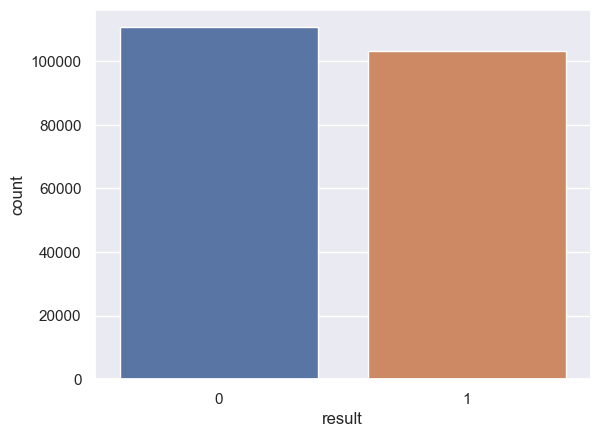

In [123]:
sns.countplot(data=delivery_df, x='result', order=[0, 1])
plt.show()

In [124]:
delivery_df.columns

Index(['match_id', 'city', 'winner', 'runs_off_bat_x', 'season', 'start_date',
       'venue', 'innings', 'ball', 'batting_team', 'bowling_team', 'striker',
       'non_striker', 'bowler', 'runs_off_bat_y', 'extras', 'wides', 'noballs',
       'byes', 'legbyes', 'penalty', 'wicket_type', 'player_dismissed',
       'other_wicket_type', 'other_player_dismissed', 'cricsheet_id',
       'current_score', 'runs_left', 'balls_left', 'wickets',
       'current_run_rate', 'req_run_rate', 'result'],
      dtype='object')

In [126]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','runs_off_bat_x','current_run_rate',
                       'req_run_rate','result']]

final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,runs_off_bat_x,current_run_rate,req_run_rate,result
0,Gujarat Titans,Mumbai Indians,Ahmedabad,224,119,10,224,0.0,11.294118,1
1,Gujarat Titans,Mumbai Indians,Ahmedabad,224,118,10,224,0.0,11.389831,1
2,Gujarat Titans,Mumbai Indians,Ahmedabad,223,117,10,224,2.0,11.435897,1
3,Gujarat Titans,Mumbai Indians,Ahmedabad,222,116,10,224,3.0,11.482759,1
4,Gujarat Titans,Mumbai Indians,Ahmedabad,222,115,10,224,2.4,11.582609,1


In [127]:
final_df.shape

(213879, 10)

In [128]:
final_df.isnull().sum()

batting_team            0
bowling_team            0
city                12397
runs_left               0
balls_left              0
wickets                 0
runs_off_bat_x          0
current_run_rate        0
req_run_rate            0
result                  0
dtype: int64

In [130]:
12397/213879*100

5.796267983298968

In [131]:
# dropping of null values
final_df = final_df.dropna()
final_df.isnull().sum()

batting_team        0
bowling_team        0
city                0
runs_left           0
balls_left          0
wickets             0
runs_off_bat_x      0
current_run_rate    0
req_run_rate        0
result              0
dtype: int64

In [132]:
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,runs_off_bat_x,current_run_rate,req_run_rate,result
0,Gujarat Titans,Mumbai Indians,Ahmedabad,224,119,10,224,0.0,11.294118,1
1,Gujarat Titans,Mumbai Indians,Ahmedabad,224,118,10,224,0.0,11.389831,1
2,Gujarat Titans,Mumbai Indians,Ahmedabad,223,117,10,224,2.0,11.435897,1
3,Gujarat Titans,Mumbai Indians,Ahmedabad,222,116,10,224,3.0,11.482759,1
4,Gujarat Titans,Mumbai Indians,Ahmedabad,222,115,10,224,2.4,11.582609,1


In [133]:
final_df['balls_left'].value_counts()

balls_left
 119    1700
 117    1700
 118    1700
 116    1698
 115    1693
        ... 
-9         5
-29        4
 41        4
-19        3
 11        3
Name: count, Length: 180, dtype: int64

In [134]:
final_df = final_df[final_df['balls_left'] !=0]
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,runs_off_bat_x,current_run_rate,req_run_rate,result
0,Gujarat Titans,Mumbai Indians,Ahmedabad,224,119,10,224,0.0,11.294118,1
1,Gujarat Titans,Mumbai Indians,Ahmedabad,224,118,10,224,0.0,11.389831,1
2,Gujarat Titans,Mumbai Indians,Ahmedabad,223,117,10,224,2.0,11.435897,1
3,Gujarat Titans,Mumbai Indians,Ahmedabad,222,116,10,224,3.0,11.482759,1
4,Gujarat Titans,Mumbai Indians,Ahmedabad,222,115,10,224,2.4,11.582609,1


In [135]:
final_df['batting_team'].unique()

array(['Gujarat Titans', 'Mumbai Indians', 'Lucknow Super Giants',
       'Chennai Super Kings', 'Sunrisers Hyderabad',
       'Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Delhi Capitals', 'Punjab Kings', 'Rajasthan Royals',
       'Kings XI Punjab', 'Delhi Daredevils', 'Deccan Chargers'],
      dtype=object)

In [136]:
final_df['balls_left'].value_counts()

balls_left
 119    1700
 117    1700
 118    1700
 116    1698
 115    1693
        ... 
-9         5
-29        4
 41        4
-19        3
 11        3
Name: count, Length: 180, dtype: int64

In [137]:
data = final_df.copy()
test = data['result']
train = data.drop(['result'], axis=1)
train.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,runs_off_bat_x,current_run_rate,req_run_rate
0,Gujarat Titans,Mumbai Indians,Ahmedabad,224,119,10,224,0.0,11.294118
1,Gujarat Titans,Mumbai Indians,Ahmedabad,224,118,10,224,0.0,11.389831
2,Gujarat Titans,Mumbai Indians,Ahmedabad,223,117,10,224,2.0,11.435897
3,Gujarat Titans,Mumbai Indians,Ahmedabad,222,116,10,224,3.0,11.482759
4,Gujarat Titans,Mumbai Indians,Ahmedabad,222,115,10,224,2.4,11.582609


In [138]:
train['batting_team'].unique()

array(['Gujarat Titans', 'Mumbai Indians', 'Lucknow Super Giants',
       'Chennai Super Kings', 'Sunrisers Hyderabad',
       'Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Delhi Capitals', 'Punjab Kings', 'Rajasthan Royals',
       'Kings XI Punjab', 'Delhi Daredevils', 'Deccan Chargers'],
      dtype=object)

In [139]:
test.head()

0    1
1    1
2    1
3    1
4    1
Name: result, dtype: int64

In [140]:
test.value_counts()

result
0    103976
1     97506
Name: count, dtype: int64

In [141]:
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=1,stratify=test)

In [142]:
x_train.shape, x_test.shape

((161185, 9), (40297, 9))

In [143]:
x_train.columns

Index(['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets', 'runs_off_bat_x', 'current_run_rate', 'req_run_rate'],
      dtype='object')

In [144]:
x_train.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,runs_off_bat_x,current_run_rate,req_run_rate
8773,Chennai Super Kings,Rajasthan Royals,Jaipur,-66,35,4,192,18.211765,-11.314286
48841,Punjab Kings,Rajasthan Royals,Mumbai,116,9,8,216,5.405405,77.333333
111080,Sunrisers Hyderabad,Rajasthan Royals,Mumbai,30,-47,7,187,5.640719,-3.829787
160075,Royal Challengers Bangalore,Chennai Super Kings,Chennai,82,3,9,190,5.538462,164.000000
908,Mumbai Indians,Sunrisers Hyderabad,Mumbai,-100,28,4,189,18.847826,-21.428571


In [145]:
x_train.city.unique()

array(['Jaipur', 'Mumbai', 'Chennai', 'Hyderabad', 'Kolkata', 'Bangalore',
       'Bengaluru', 'Port Elizabeth', 'Abu Dhabi', 'Delhi', 'Pune',
       'Chandigarh', 'Sharjah', 'Guwahati', 'Dharamsala', 'Navi Mumbai',
       'Raipur', 'Cuttack', 'Kimberley', 'Durban', 'Ahmedabad',
       'Centurion', 'Indore', 'Visakhapatnam', 'Cape Town', 'Dubai',
       'Johannesburg', 'East London', 'Bloemfontein', 'Nagpur', 'Ranchi',
       'Lucknow'], dtype=object)

In [146]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [147]:
# batting_team, bowling_team and city are categorical columns/variables
# they will be converted to numeric using onehot encoder method

cf = ColumnTransformer([
    ('trf', OneHotEncoder(drop='first'), ['batting_team', 'bowling_team',
                                          'city'])], 
    remainder='passthrough'
)

In [148]:
cf

ColumnTransformer(remainder='passthrough',
                  transformers=[('trf', OneHotEncoder(drop='first'),
                                 ['batting_team', 'bowling_team', 'city'])])

In [149]:
pipe = Pipeline(steps=[
    ('step1', cf),('step2', LogisticRegression(solver='liblinear') )])

In [150]:
pipe

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first'),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [151]:
# fitting the training data
pipe.fit(x_train, y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first'),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [152]:
y_pred = pipe.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.6026006898776584


In [ ]:
print(metrics.classification_report(y_test, y_pred))

In [ ]:
# Reality Check : 0 (loose the match prob) - 46% and 1 (win probability)-53%
pipe.predict_proba(x_test)[10]

In [ ]:
pipe2 = Pipeline(steps=[
    ('step1', cf),('step2', RandomForestClassifier() )])
pipe2.fit(x_train, y_train)
print(metrics.accuracy_score(y_test, pipe2.predict(x_test)))

In [ ]:
print(metrics.classification_report(y_test, pipe2.predict(x_test)))

In [ ]:
# Reality Check : 0 (loose the match prob) - 46% and 1 (win probability)-53%
pipe2.predict_proba(x_test)[10]

In [ ]:
import pickle
pickle.dump(pipe, open('pipe.pkl','wb'))